In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

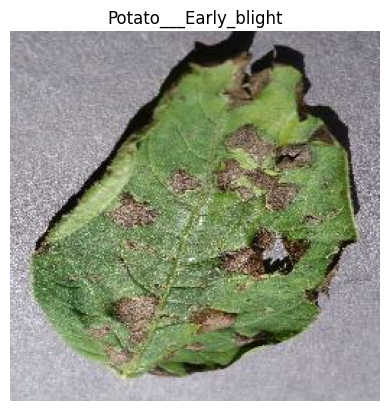

In [6]:
for image_batch, labels_batch in dataset.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    plt.imshow(first_image)
    plt.axis("off")
    plt.title(class_names[labels_batch[0]])
    plt.show()

(32, 256, 256, 3)
[0 0 1 0 0 1 2 1 1 0 0 0 0 0 1 1 0 2 1 1 0 0 1 0 0 1 1 0 0 0 0 1]


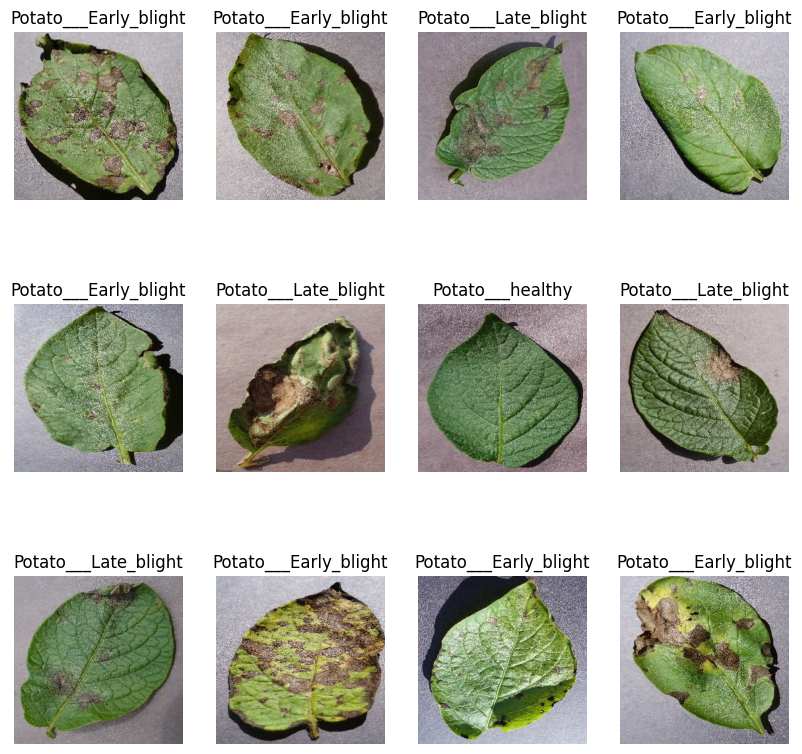

In [7]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
      ax = plt.subplot(3,4,i+1)
      
      plt.title(class_names[labels_batch[i]])
      plt.imshow(image_batch[i].numpy().astype('uint8')) 
      plt.axis("off")   

80% ==> Training
20% ==> Test
10% ==> Validation
10% ==> Test


In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [11]:
validation_size = 0.1
len(dataset)*validation_size

6.800000000000001

In [12]:
validation_ds = test_ds.take(6)
len(validation_ds) 

6

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, validation_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + validation_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    validation_size = int(validation_split * ds_size)
    
    train_ds = ds.take(train_size)
    validation_ds = ds.skip(train_size).take(validation_size)
    test_ds = ds.skip(train_size).skip(validation_size)
    
    return train_ds, validation_ds, test_ds

In [15]:
trian_ds, validation_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(trian_ds)

54

In [17]:
len(validation_ds)

6

In [18]:
len(test_ds)

8

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch[0].numpy()/255)

[[[0.63529414 0.6509804  0.69803923]
  [0.6392157  0.654902   0.7019608 ]
  [0.6509804  0.6666667  0.7137255 ]
  ...
  [0.49803922 0.5137255  0.56078434]
  [0.49019608 0.5058824  0.5529412 ]
  [0.5058824  0.52156866 0.5686275 ]]

 [[0.6313726  0.64705884 0.69411767]
  [0.63529414 0.6509804  0.69803923]
  [0.64705884 0.6627451  0.70980394]
  ...
  [0.4862745  0.5019608  0.54901963]
  [0.48235294 0.49803922 0.54509807]
  [0.49411765 0.50980395 0.5568628 ]]

 [[0.6313726  0.64705884 0.69411767]
  [0.63529414 0.6509804  0.69803923]
  [0.6431373  0.65882355 0.7058824 ]
  ...
  [0.48235294 0.49803922 0.54509807]
  [0.47843137 0.49411765 0.5411765 ]
  [0.49019608 0.5058824  0.5529412 ]]

 ...

 [[0.7294118  0.7411765  0.76862746]
  [0.73333335 0.74509805 0.77254903]
  [0.7372549  0.7490196  0.7764706 ]
  ...
  [0.5568628  0.5529412  0.5764706 ]
  [0.5411765  0.5372549  0.56078434]
  [0.53333336 0.5294118  0.5529412 ]]

 [[0.7372549  0.7490196  0.7764706 ]
  [0.73333335 0.74509805 0.77254903]


In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])
                                         

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])
     

In [23]:
from tensorflow.keras import layers
import tensorflow as tf

IMAGE_SIZE = 224  # example

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])


In [30]:

CHANNELS

3

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, activation='relu', input_shape= input_shape),
    layers.MaxPooling2D(2,2),
    
])